### Load Loan Prediction Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('train_loan.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
datta= data.drop(['Dependents', 'Loan_ID'], axis=1)

In [5]:
datta.columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
datta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Education          614 non-null    object 
 3   Self_Employed      582 non-null    object 
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         592 non-null    float64
 7   Loan_Amount_Term   600 non-null    float64
 8   Credit_History     564 non-null    float64
 9   Property_Area      614 non-null    object 
 10  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 52.9+ KB


In [7]:
datta.isna().sum()

Gender               13
Married               3
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
mode_gender = data['Gender'].mode()[0]
mode_gender

'Male'

In [9]:
mode_married = data['Married'].mode()[0]
mode_married

'Yes'

In [10]:
mode_job = data['Self_Employed'].mode()[0]
mode_job

'No'

In [11]:
datta['Gender'] = datta['Gender'].fillna(value = mode_gender)
datta['Married'] = datta['Married'].fillna(value = mode_married)
datta['Self_Employed'] = datta['Self_Employed'].fillna(value = mode_job)

In [12]:
datta['LoanAmount'] = datta['LoanAmount'].fillna(datta['LoanAmount'].mode()[0])
datta['Loan_Amount_Term'] = datta['Loan_Amount_Term'].fillna(datta['Loan_Amount_Term'].mode()[0])
datta['Credit_History'] = datta['Credit_History'].fillna(datta['Credit_History'].mode()[0])

In [13]:
datta.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [14]:
datta.isna().sum()

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
datta.nunique()

Gender                 2
Married                2
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

<Axes: xlabel='Property_Area', ylabel='count'>

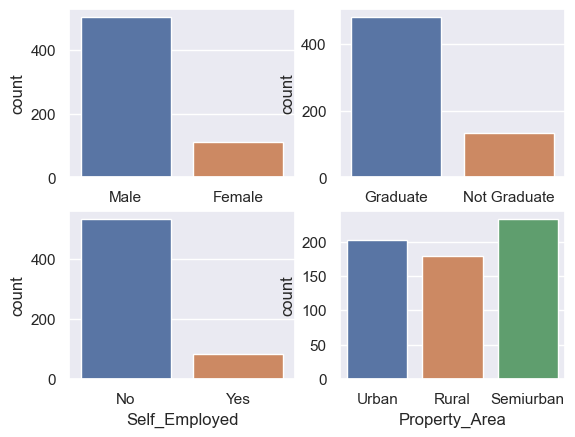

In [16]:
fig, ax = plt.subplots(2,2)
sns.countplot(x=datta['Gender'],ax=ax[0,0])
sns.countplot(x=datta['Education'], ax=ax[0,1])
sns.countplot(x=datta['Self_Employed'], ax=ax[1,0])
sns.countplot(x=datta['Property_Area'], ax=ax[1,1])

<Axes: xlabel='Married', ylabel='count'>

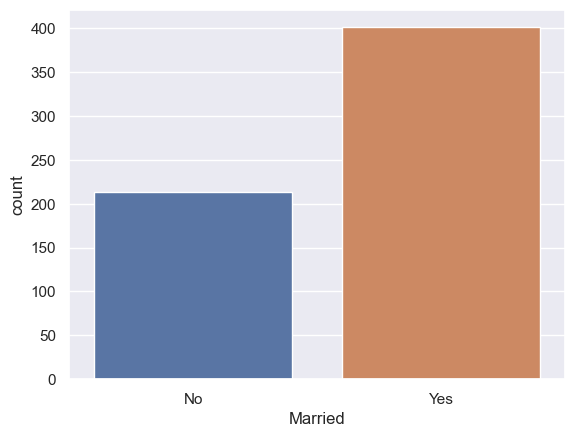

In [17]:
sns.countplot(x=datta['Married'])

In [18]:
datta['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [19]:
datta['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [20]:
datta['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [21]:
datta['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [22]:
datta['Property_Area'].value_counts()


Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [23]:
datta['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [24]:
from sklearn import linear_model,preprocessing

In [25]:
label_encoder = preprocessing.LabelEncoder()

In [26]:
datta['Education']= label_encoder.fit_transform(datta['Education'])


In [27]:
datta['Self_Employed']= label_encoder.fit_transform(datta['Self_Employed'])

In [28]:
datta['Married']= label_encoder.fit_transform(datta['Married'])

In [29]:
datta['Gender']= label_encoder.fit_transform(datta['Gender'])

In [30]:
datta['Property_Area']= label_encoder.fit_transform(datta['Property_Area'])

In [31]:
datta['Loan_Status']= label_encoder.fit_transform(datta['Loan_Status'])

In [32]:
datta.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [33]:
datta.isna().sum()

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [34]:
datta.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


C:\Users\ADESEWA\AppData\Local\Temp\ipykernel_13988\3585394943.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True)


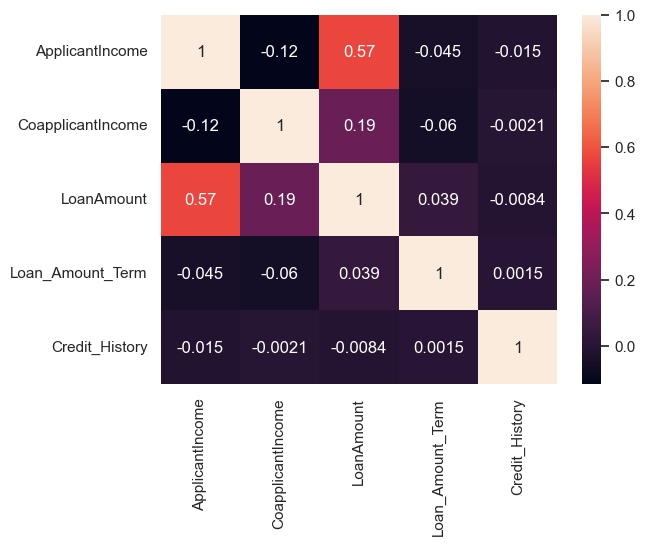

In [35]:
sns.heatmap(data.corr(), annot = True)
plt.show()

<Axes: >

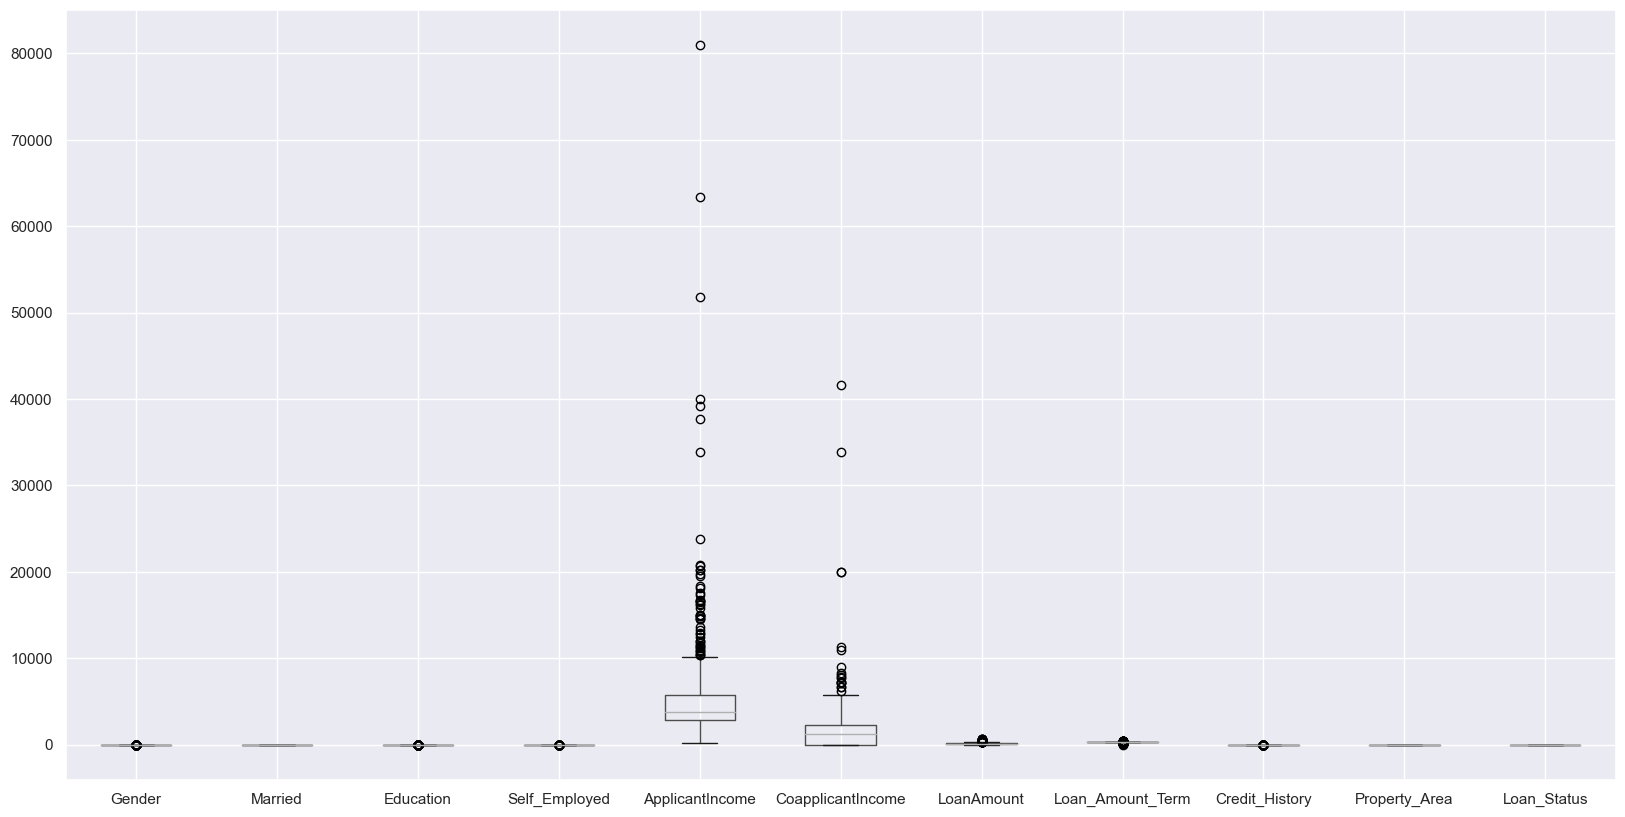

In [36]:
plt.figure(figsize = (20,10))
datta.boxplot()

In [37]:
datta.skew(axis = 0, skipna = True)

Gender              -1.648795
Married             -0.644850
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.745407
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

<Axes: xlabel='CoapplicantIncome'>

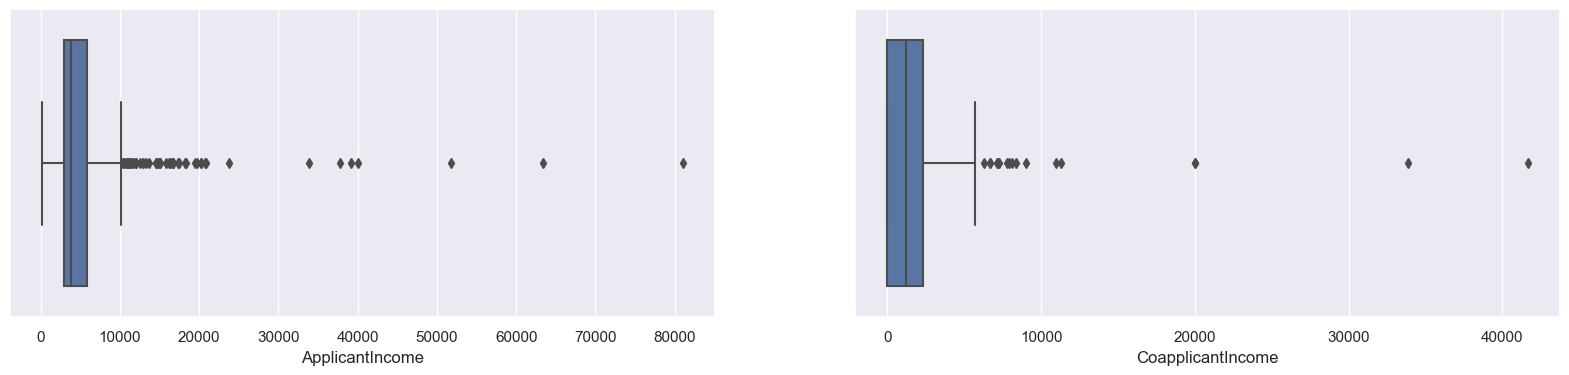

In [38]:
fig,(ax1,ax2)=plt.subplots(ncols=2,sharey=True,figsize=(20,4))
sns.boxplot(x='ApplicantIncome',data=datta,ax=ax1)
sns.boxplot(x='CoapplicantIncome',data=datta,ax=ax2)

<Axes: >

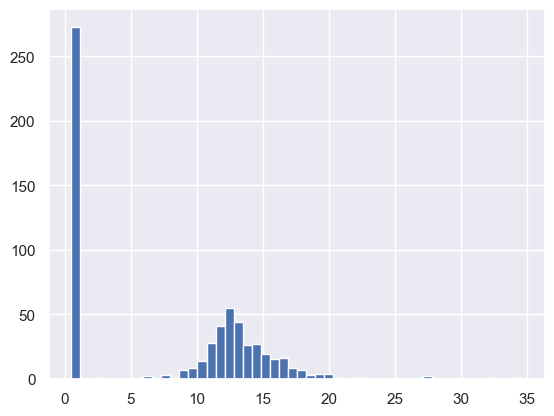

In [39]:
CoapplicantIncome = np.cbrt(datta['CoapplicantIncome']+0.1)
CoapplicantIncome.hist(bins=50)

In [40]:
datta['CoapplicantIncome']= CoapplicantIncome
datta.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,5849,0.464159,120.0,360.0,1.0,2,1
1,1,1,0,0,4583,11.467710,128.0,360.0,1.0,0,0
2,1,1,0,1,3000,0.464159,66.0,360.0,1.0,2,1
3,1,1,1,0,2583,13.310287,120.0,360.0,1.0,2,1
4,1,0,0,0,6000,0.464159,141.0,360.0,1.0,2,1


<Axes: >

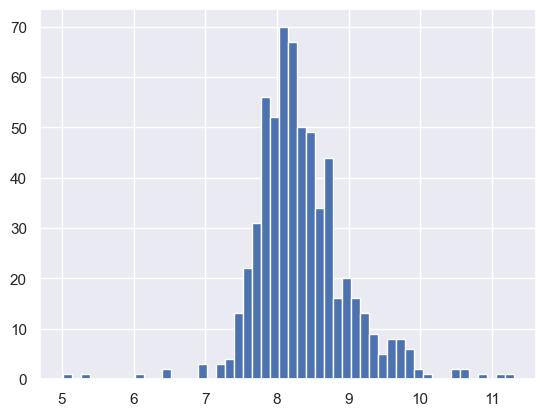

In [41]:
ApplicantIncome = np.log(datta['ApplicantIncome']+0.1)
ApplicantIncome.hist(bins=50)

In [42]:
datta['ApplicantIncome']= ApplicantIncome
datta.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,8.674043,0.464159,120.0,360.0,1.0,2,1
1,1,1,0,0,8.430131,11.467710,128.0,360.0,1.0,0,0
2,1,1,0,1,8.006401,0.464159,66.0,360.0,1.0,2,1
3,1,1,1,0,7.856746,13.310287,120.0,360.0,1.0,2,1
4,1,0,0,0,8.699531,0.464159,141.0,360.0,1.0,2,1


<Axes: xlabel='CoapplicantIncome'>

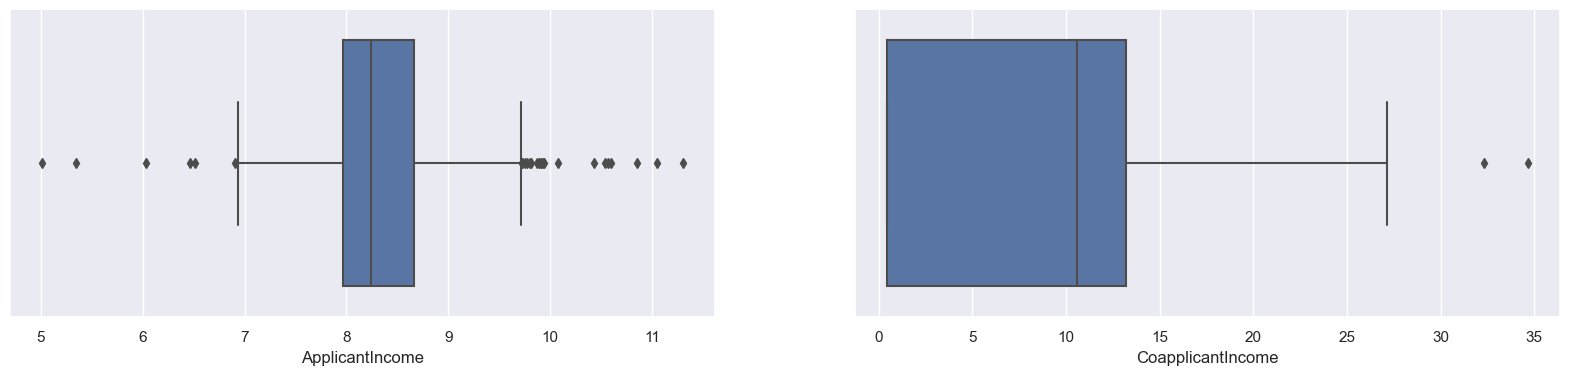

In [43]:
fig,(ax1,ax2)=plt.subplots(ncols=2,sharey=True,figsize=(20,4))
sns.boxplot(x='ApplicantIncome',data=datta,ax=ax1)
sns.boxplot(x='CoapplicantIncome',data=datta,ax=ax2)

In [44]:
datta['ApplicantIncome'].describe()

count    614.000000
mean       8.341243
std        0.645240
min        5.011302
25%        7.964711
50%        8.246067
75%        8.664767
max       11.302206
Name: ApplicantIncome, dtype: float64

In [45]:
datta['CoapplicantIncome'].describe()

count    614.000000
mean       7.687427
std        6.891635
min        0.464159
25%        0.464159
50%       10.592443
75%       13.194971
max       34.668184
Name: CoapplicantIncome, dtype: float64

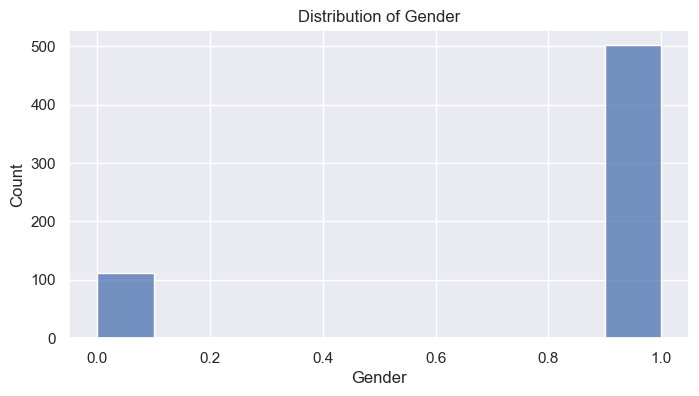

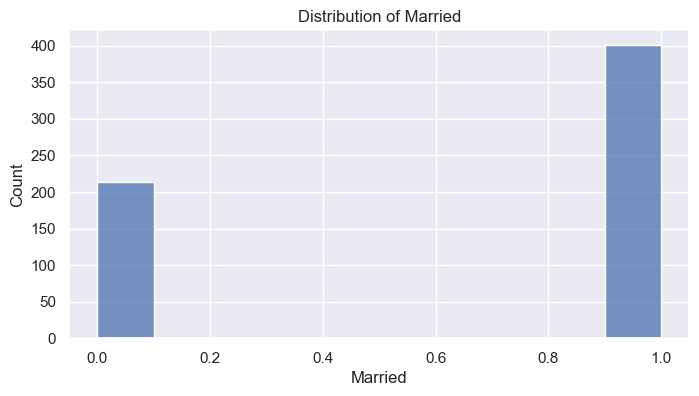

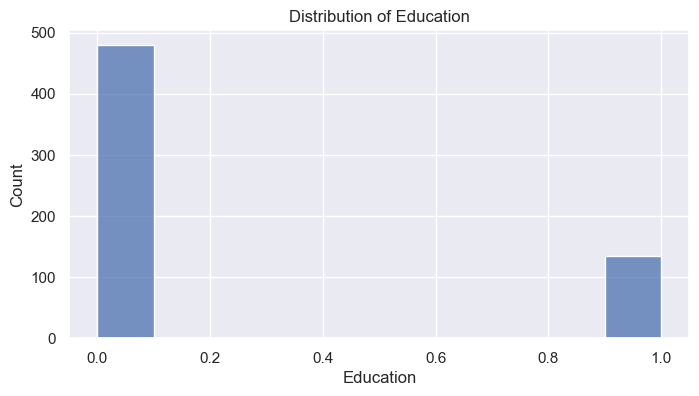

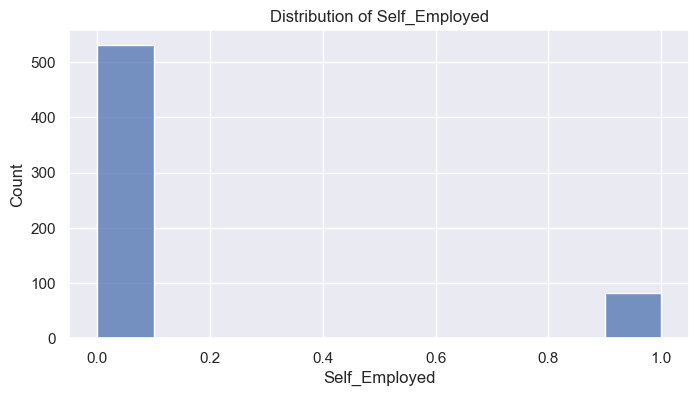

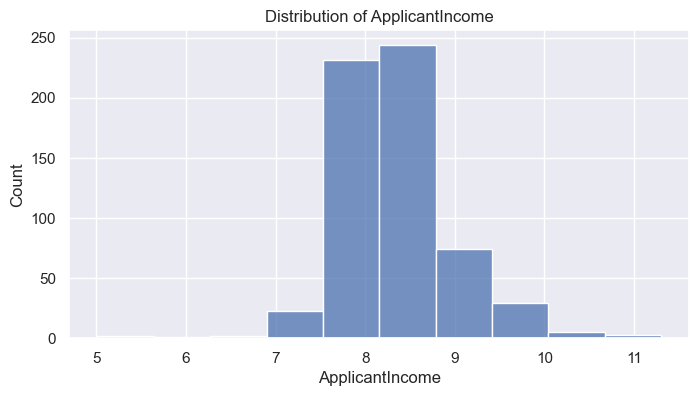

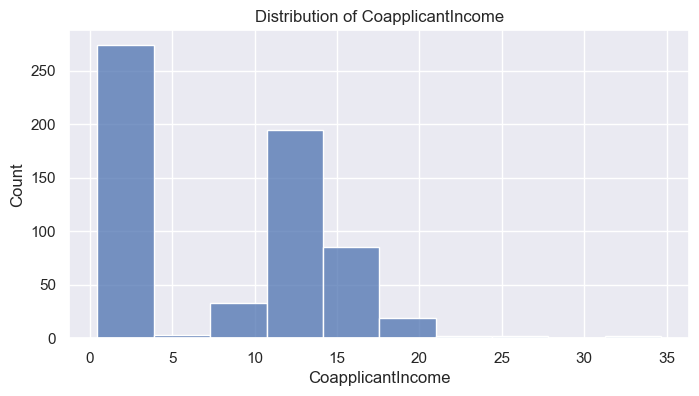

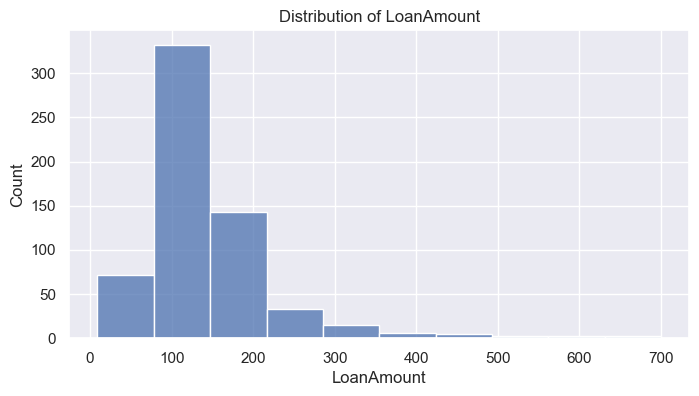

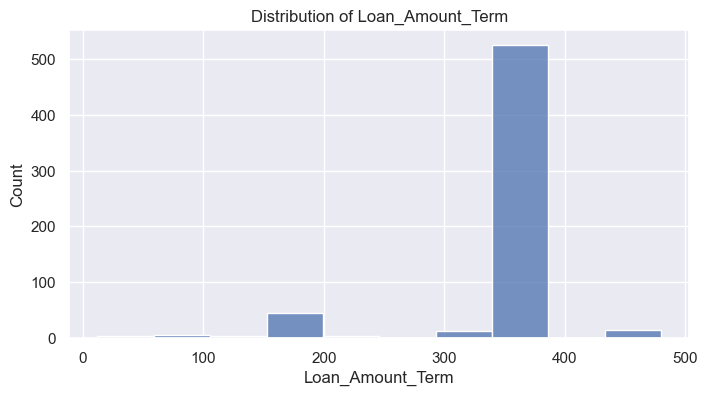

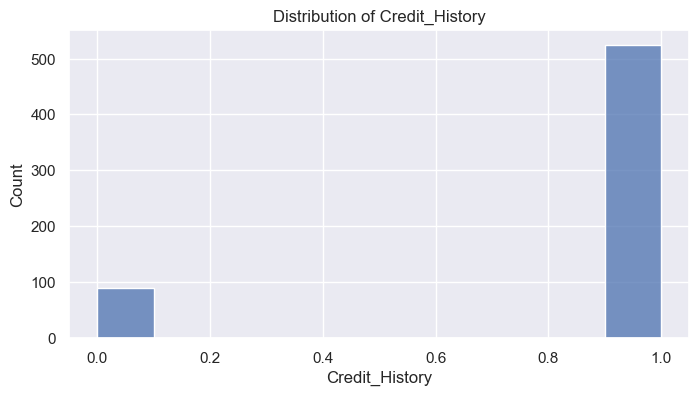

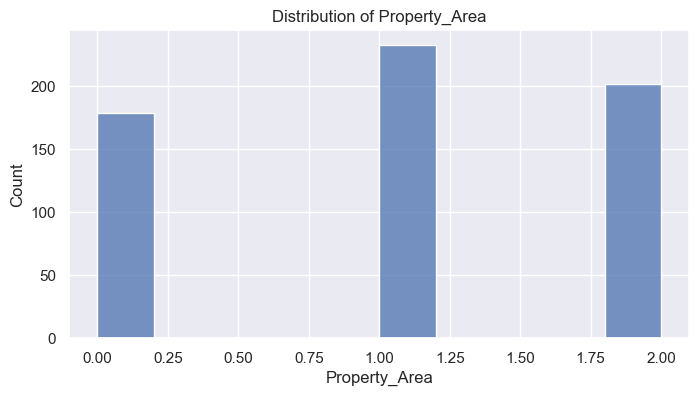

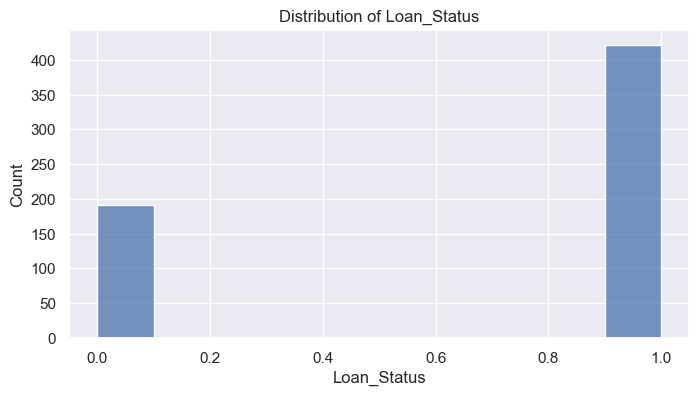

In [46]:
for col in datta:
    plt.figure(figsize=(8,4))
    sns.histplot(data=datta,x=col,bins=10)
    plt.title(f"Distribution of {col}")